### Description

#### Background & Context
The HR team stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide. So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not. Need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.

### Objective
Explore and visualize the dataset.
Build a classification model to predict if the customer has a higher probability of getting a promotion
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the company
### Data Dictionary
• employee_id: Unique ID for the employee

• department: Department of employee

• region: Region of employment (unordered)

• education: Education Level

• gender: Gender of Employee

• recruitment_channel: Channel of recruitment for employee

• no_ of_ trainings: no of other trainings completed in the previous year on soft skills, technical skills, etc.

• age: Age of Employee

• previous_ year_ rating: Employee Rating for the previous year

• length_ of_ service: Length of service in years

• awards_ won: if awards won during the previous year then 1 else 0

• avg_ training_ score: Average score in current training evaluations

• is_promoted: (Target) Recommended for promotion



In [1]:
!pip upgrade scikit-learn

ERROR: unknown command "upgrade"



In [2]:
!pip install nb_black

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
# This will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To impute missing values
from sklearn.impute import SimpleImputer

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [5]:
data = pd.read_csv("employee_promotion.csv")
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,NaN,0


<IPython.core.display.Javascript object>

In [6]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0


<IPython.core.display.Javascript object>

In [7]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.000,5,0,49.000,0


<IPython.core.display.Javascript object>

### Checking for data type

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


<IPython.core.display.Javascript object>

- There are 13 columns in total. 5 are objects while 8 are numerical
- There are missing values in education, previous year rating and average training score columns

In [9]:
# Checking for missing values percentage
round(data.isnull().sum() / data.isnull().count() * 100, 1)

employee_id            0.000
department             0.000
region                 0.000
education              4.400
gender                 0.000
recruitment_channel    0.000
no_of_trainings        0.000
age                    0.000
previous_year_rating   7.500
length_of_service      0.000
awards_won             0.000
avg_training_score     4.700
is_promoted            0.000
dtype: float64

<IPython.core.display.Javascript object>

- The descriptive statistics are displayed for all data that are numerical.
- The minimum and maximum age for the employees are 20 and 60 respectively.
- The maximum number of promotion for the employee in the data is only 1, same to the number of awards won. 
- It is also important to note that the minimum number of trainings is approximately 1, with a maximum of 10 trainings. This reflects on the awards won and the number of promotions per employee. 

In [10]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [11]:
data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

<IPython.core.display.Javascript object>

- Since every employee has a unique ID, we can drop this column.
- Every other column also has more than 1 unique values

### Descriptive Statistics

In [12]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000,54808.000,54808.000,50684.000,54808.000,54808.000,52248.000,54808.000
mean,39195.831,1.253,34.804,3.329,5.866,0.023,63.712,0.085
std,22586.581,0.609,7.660,1.260,4.265,0.150,13.522,0.279
min,1.000,1.000,20.000,1.000,1.000,0.000,39.000,0.000
25%,19669.750,1.000,29.000,3.000,3.000,0.000,51.000,0.000
50%,39225.500,1.000,33.000,3.000,5.000,0.000,60.000,0.000
75%,58730.500,1.000,39.000,4.000,7.000,0.000,77.000,0.000
max,78298.000,10.000,60.000,5.000,37.000,1.000,99.000,1.000


<IPython.core.display.Javascript object>

In [13]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are:")
    print(round(data[i].value_counts() / data[i].value_counts().sum() * 100), 2)
    print("*" * 60)  # To space the output after every department listing

Unique values in department are:
Sales & Marketing   31.000
Operations          21.000
Technology          13.000
Procurement         13.000
Analytics           10.000
Finance              5.000
HR                   4.000
Legal                2.000
R&D                  2.000
Name: department, dtype: float64 2
************************************************************
Unique values in region are:
region_2    23.000
region_22   12.000
region_7     9.000
region_15    5.000
region_13    5.000
region_26    4.000
region_31    4.000
region_4     3.000
region_27    3.000
region_16    3.000
region_28    2.000
region_11    2.000
region_23    2.000
region_29    2.000
region_32    2.000
region_19    2.000
region_20    2.000
region_14    2.000
region_25    1.000
region_17    1.000
region_5     1.000
region_6     1.000
region_30    1.000
region_8     1.000
region_10    1.000
region_1     1.000
region_24    1.000
region_12    1.000
region_9     1.000
region_21    1.000
region_3     1.000
region_34 

<IPython.core.display.Javascript object>

- There are 9 departments. 31% of the employees come from sales and marketing department. R&D and legal departments has the least employees among all the departments
- Most of the employees (23%) come from region 2.
- 70% of the employees are male while only 30% are female.
- In education column, there are 3 unique values. 70% of the total employees have completed bachelors degree while 28% have Masters and above. Only 2% have below Secondary education. 

In [14]:
data.drop(columns="employee_id", inplace=True)

<IPython.core.display.Javascript object>

In [15]:
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,NaN,0


<IPython.core.display.Javascript object>

## Data Processing

#### Univariate Analysis

In [16]:
# creating a function that plots histogram and boxplot
sns.set(style="darkgrid")


def histogram_boxplot(data, feature, figsize=(12, 6), kde=False, bins=15):

    f, (ax_box, ax_histo) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.20, 0.80)}, figsize=figsize
    )
    # creating the subplots
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="violet")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_histo, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_histo)

    # Adding mean and median to the histogram
    ax_histo.axvline(data[feature].mean(), color="black", linestyle="--")
    ax_histo.axvline(data[feature].median(), color="violet", linestyle="-")
    plt.show()

<IPython.core.display.Javascript object>

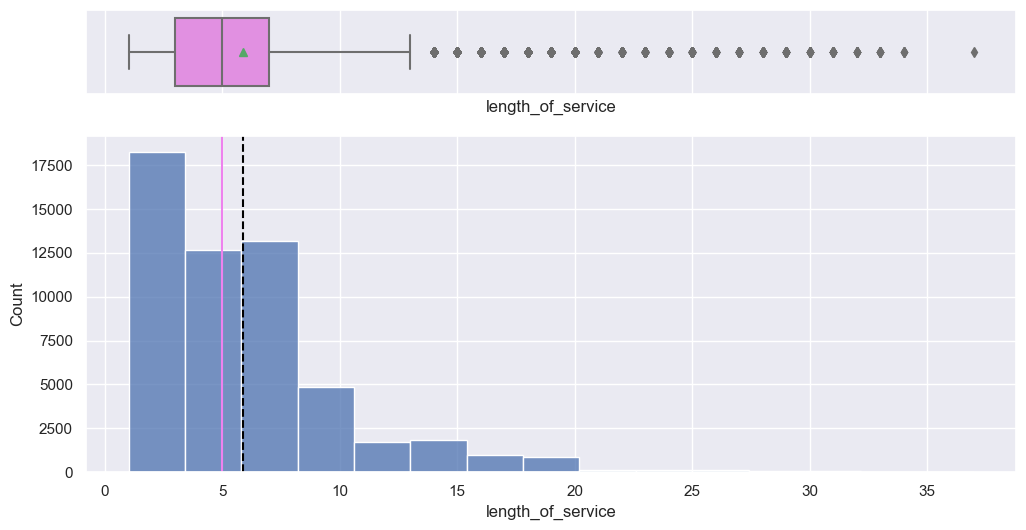

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "length_of_service")

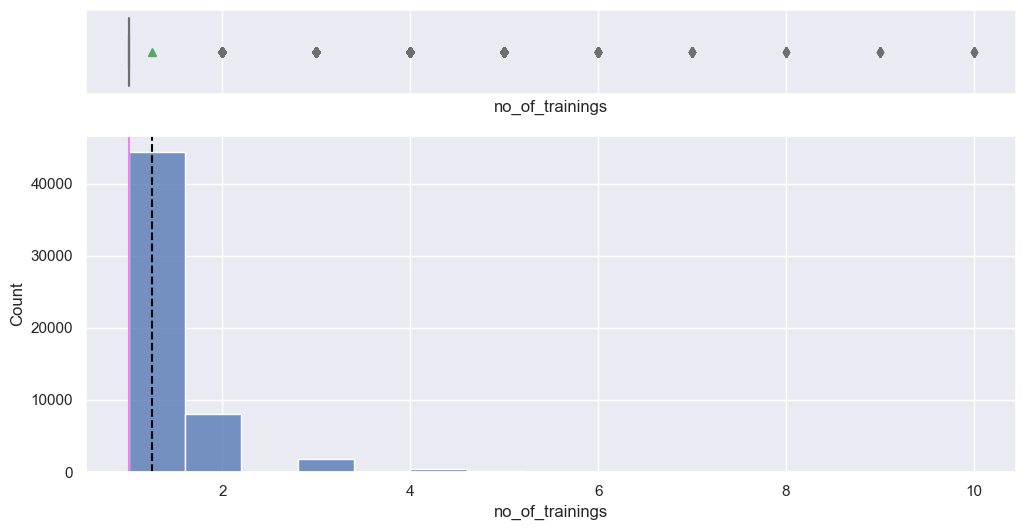

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "no_of_trainings")

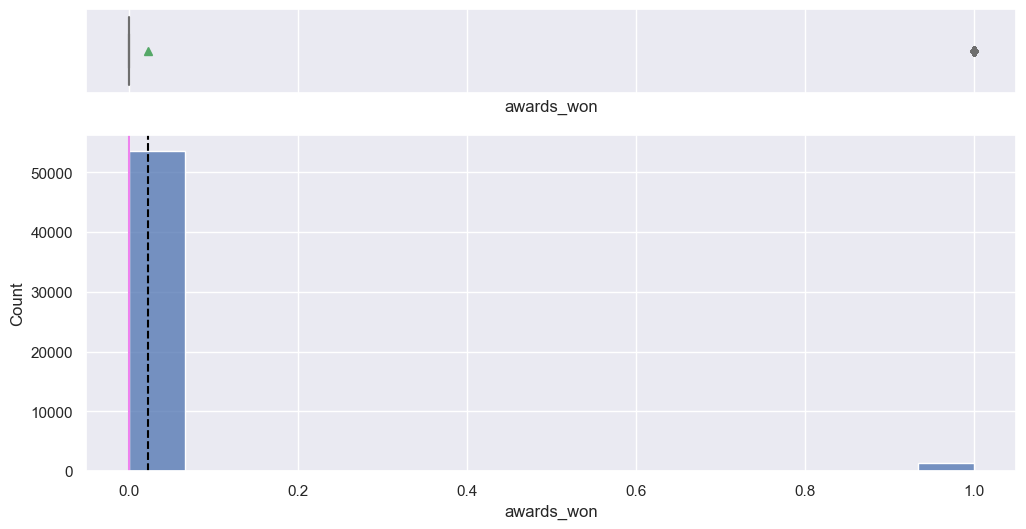

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "awards_won")

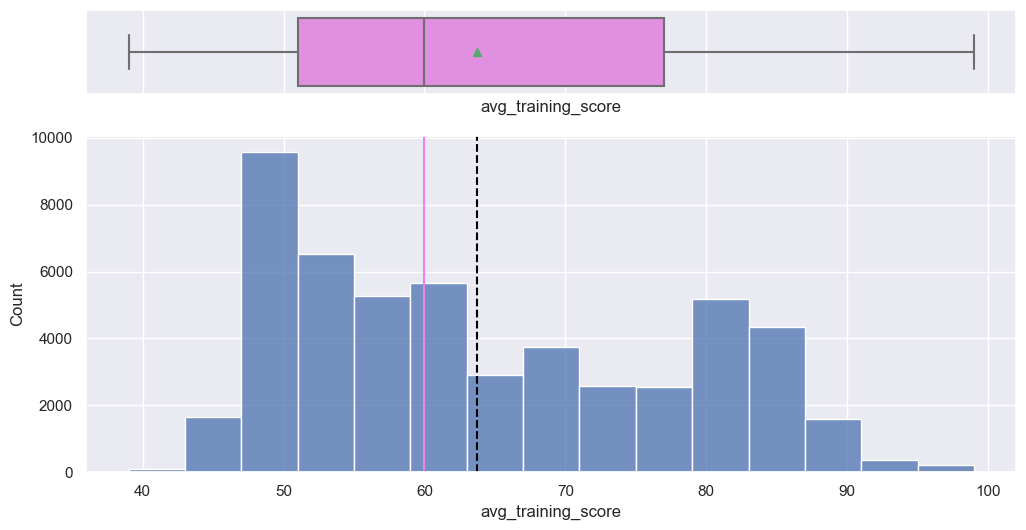

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "avg_training_score")

- The average training score is approximatetly 65.
- The median of the score is around 60.

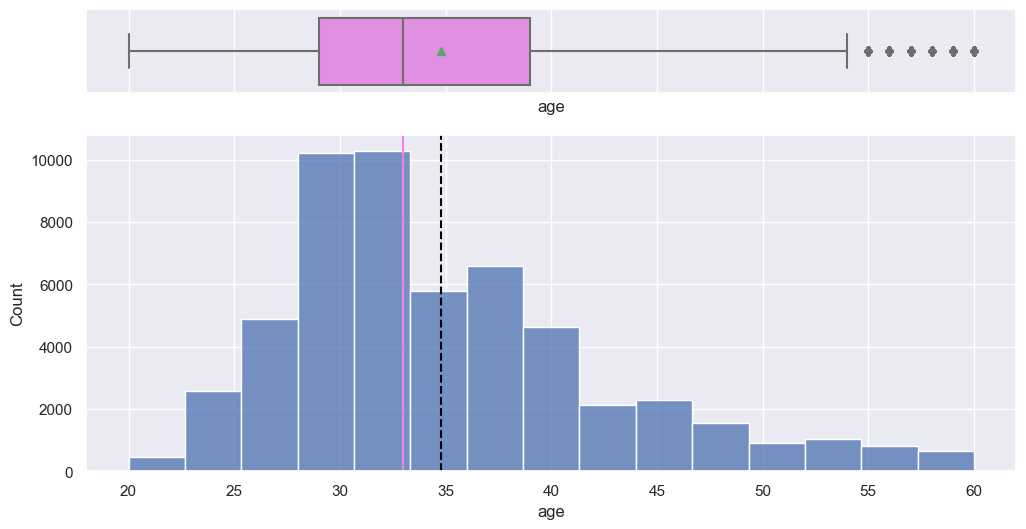

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "age")

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

## Observation on recruitment channel

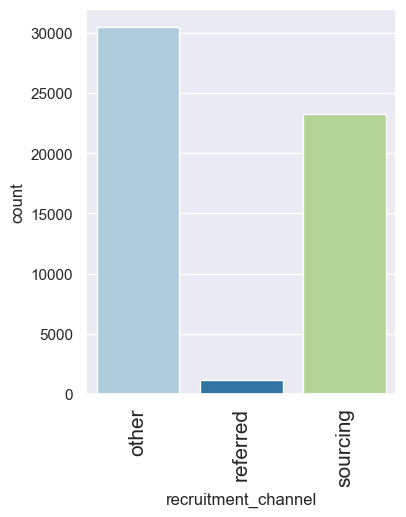

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "recruitment_channel")

## Observation on gender

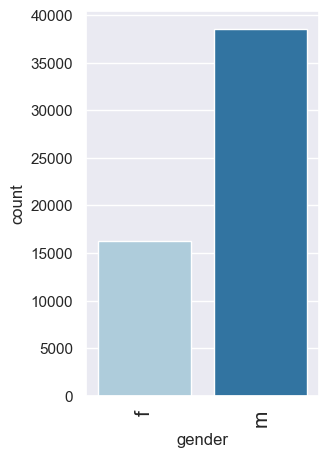

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "gender")

- A large number of the employees are male.

## Observation on Awards won

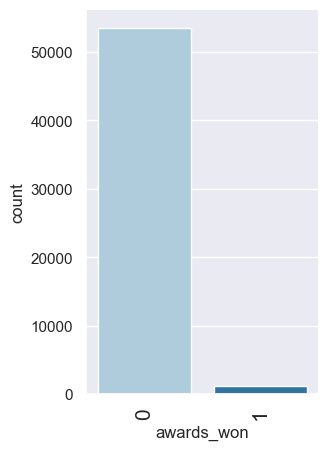

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "awards_won")

Only 1270 people out of 58,808 have received an award.

## Observation level of Education

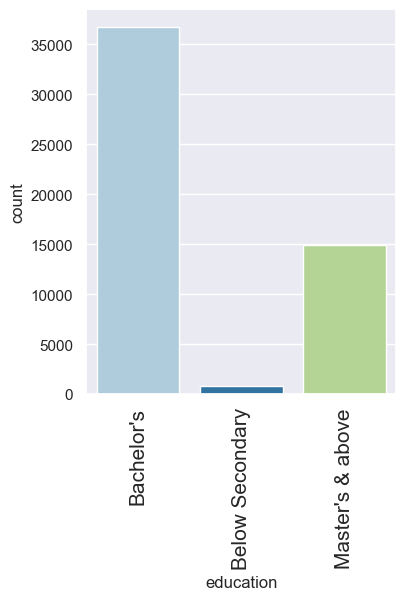

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "education")

## Observation on departments

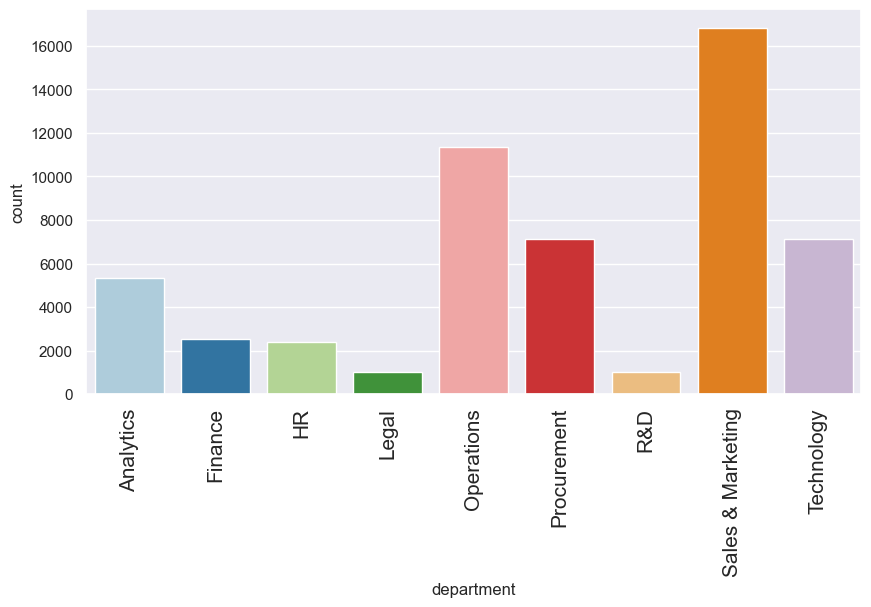

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "department")

- A large number of employees comes from the sales and mareting department followed by operations and procurement departments

## Observation on previous year rating

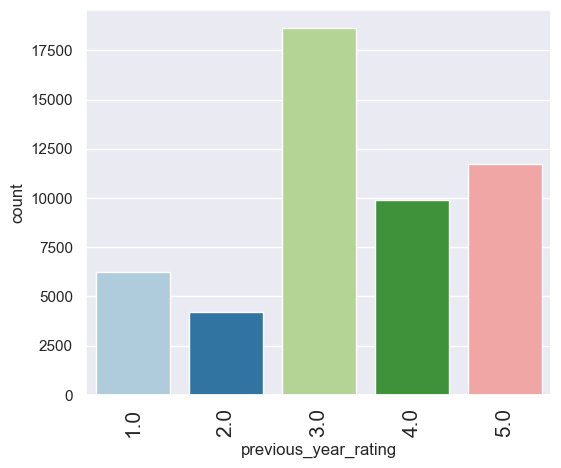

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "previous_year_rating")

Most people received a rating of 3 followed by 5 on their previous year of working with the company

## Obsevation on the target variable 

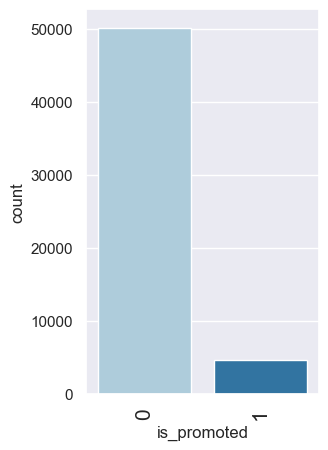

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "is_promoted")

## Bivariate Analysis

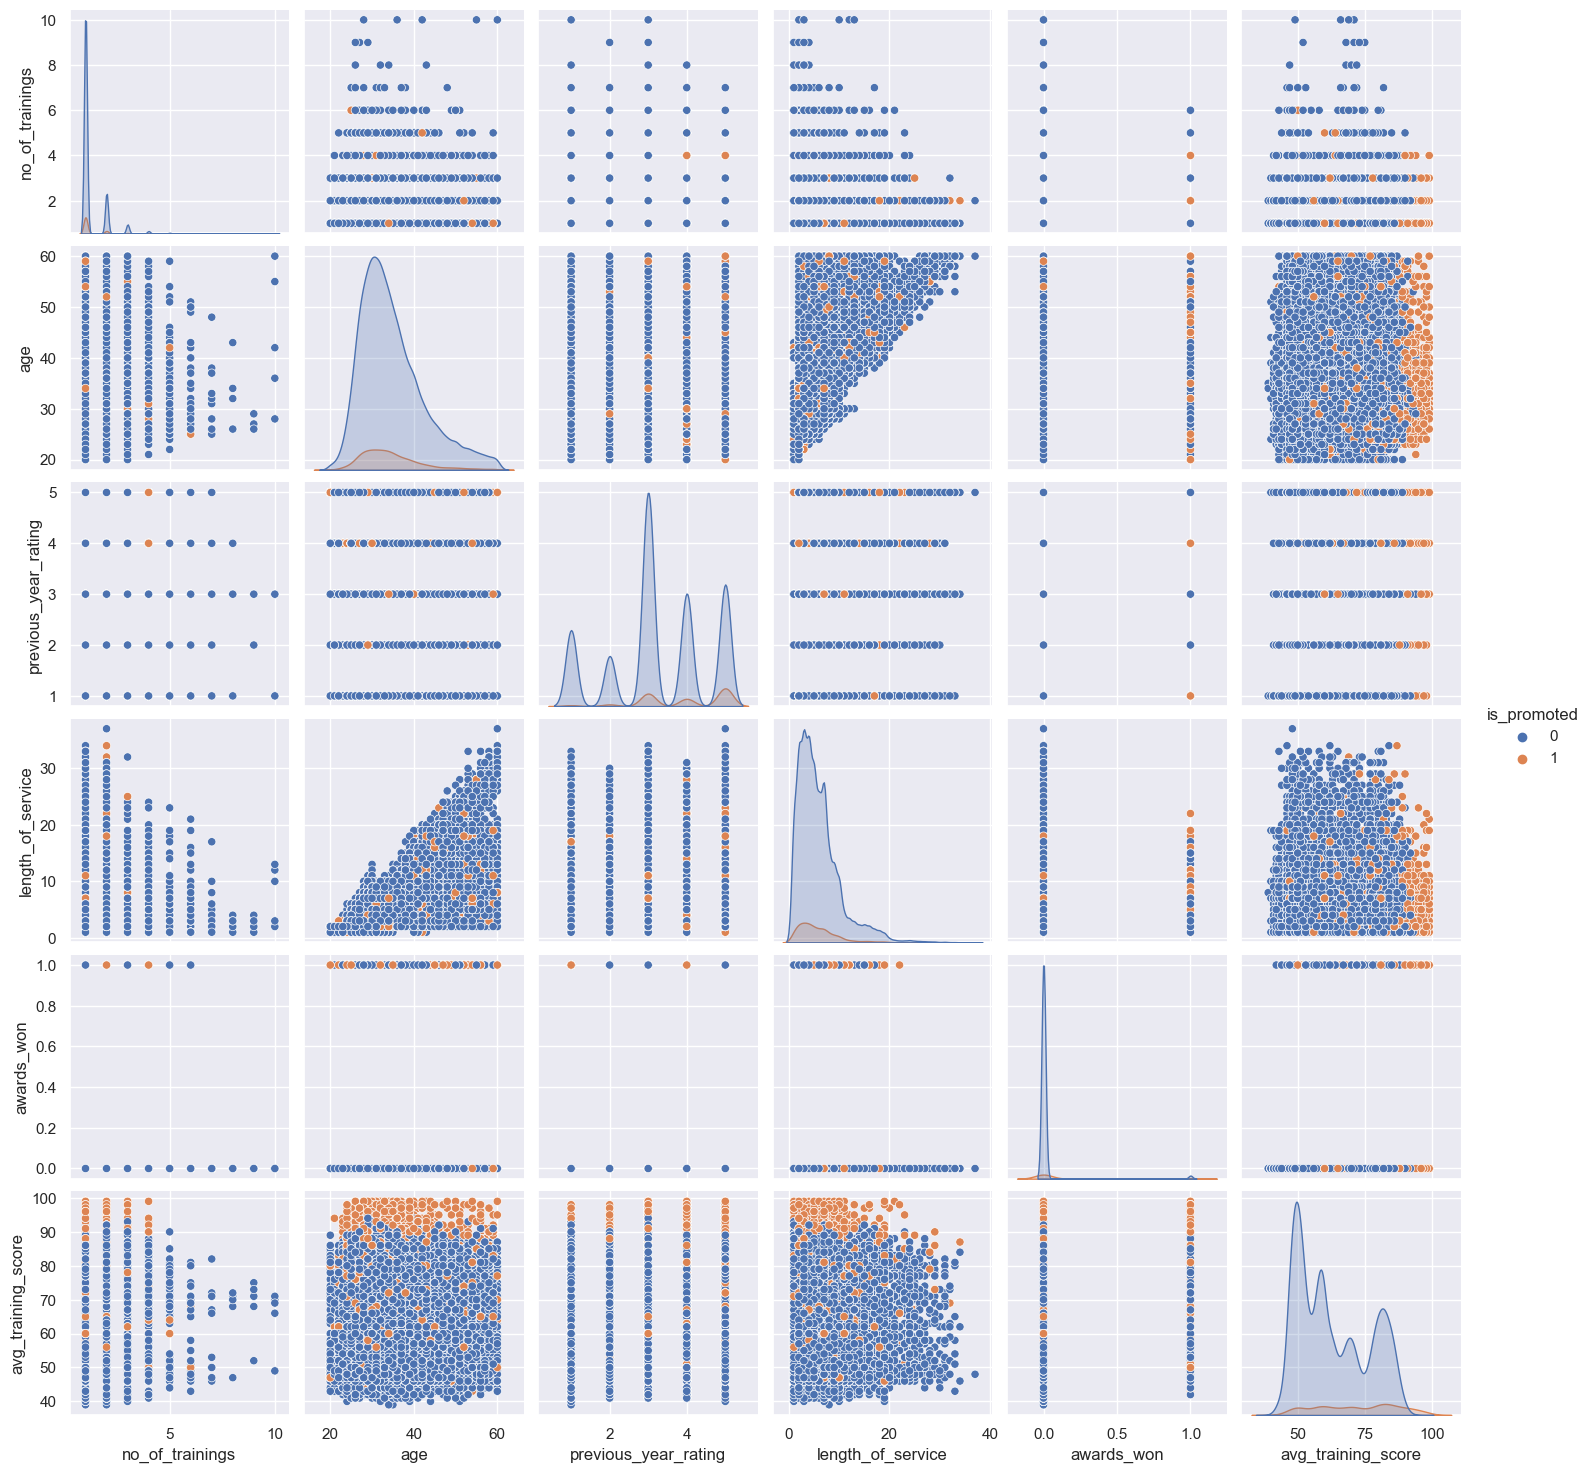

<IPython.core.display.Javascript object>

In [30]:
sns.pairplot(data, hue="is_promoted")

In [31]:
## Function to plot distributions (For numerical data/columns)
def distribution_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    target_uniq = data[target].unique()
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="blue",
    )
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="violet",
    )
    axs[1, 0].set_title("Boxplot with the target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 1].set_title("Boxplot (without outliers) with the target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

## Target variable vs age

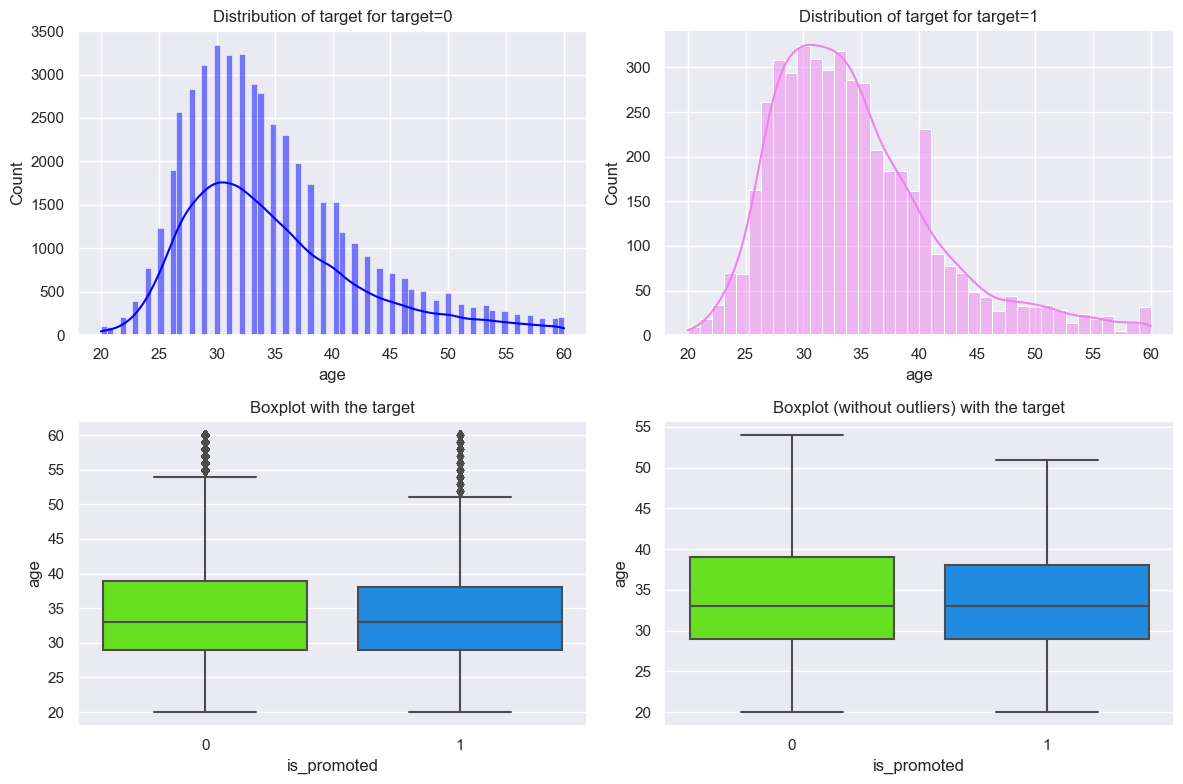

<IPython.core.display.Javascript object>

In [32]:
distribution_target(data, "age", "is_promoted")

## Target variable vs number of trainings

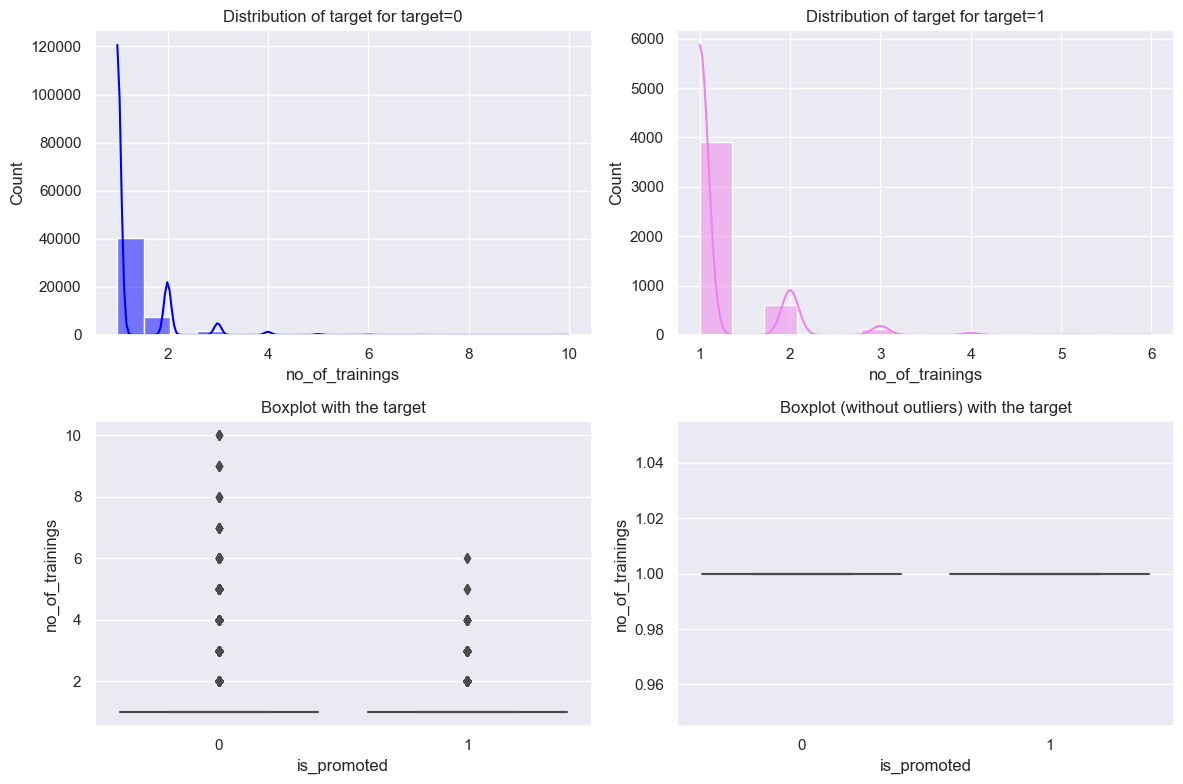

<IPython.core.display.Javascript object>

In [33]:
distribution_target(data, "no_of_trainings", "is_promoted")

## Target variable vs Length of Service

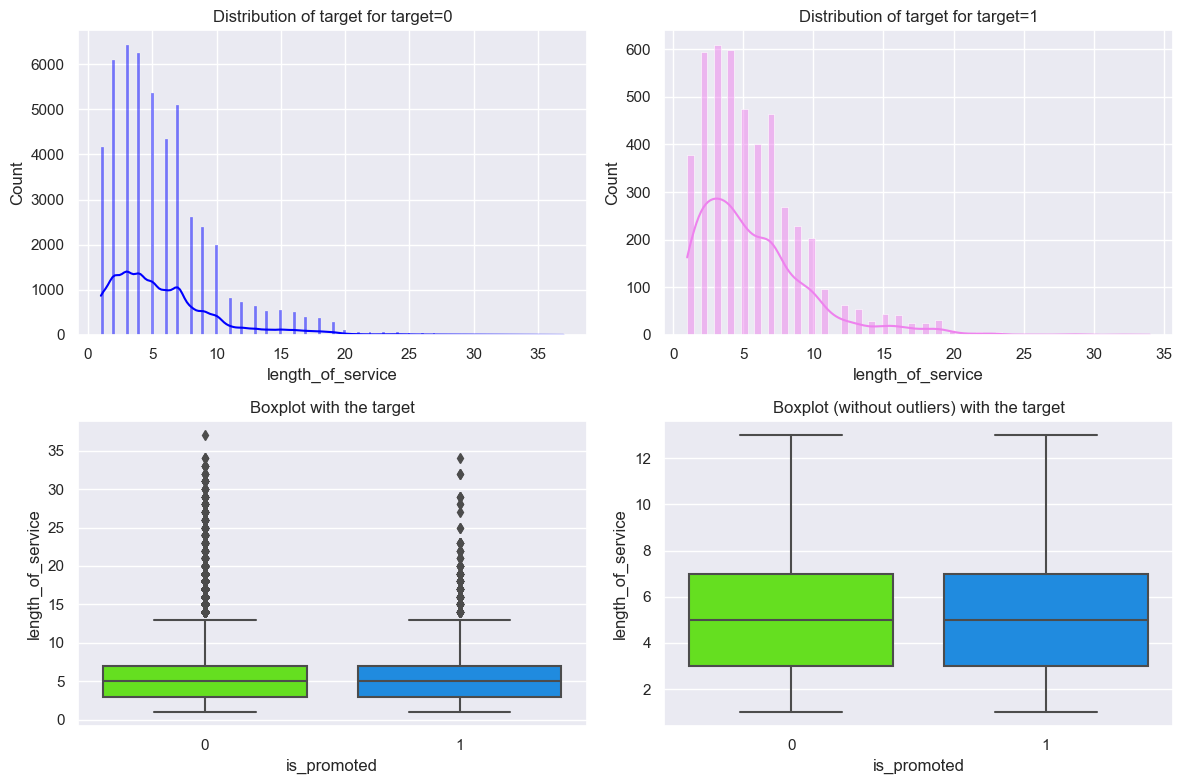

<IPython.core.display.Javascript object>

In [34]:
distribution_target(data, "length_of_service", "is_promoted")

## Target variable vs average training score

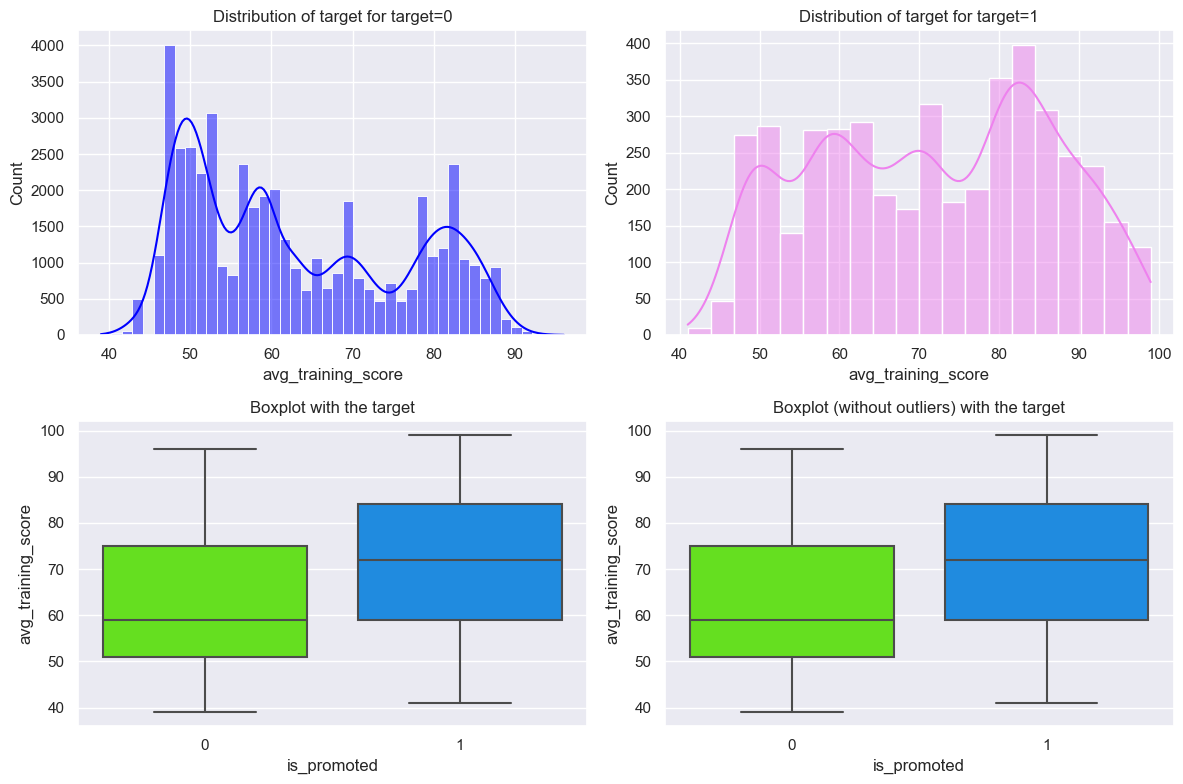

<IPython.core.display.Javascript object>

In [35]:
distribution_target(data, "avg_training_score", "is_promoted")

In [36]:
##function to plot stacked bar chart (For categorical data/columns)
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

## Target variable vs Department

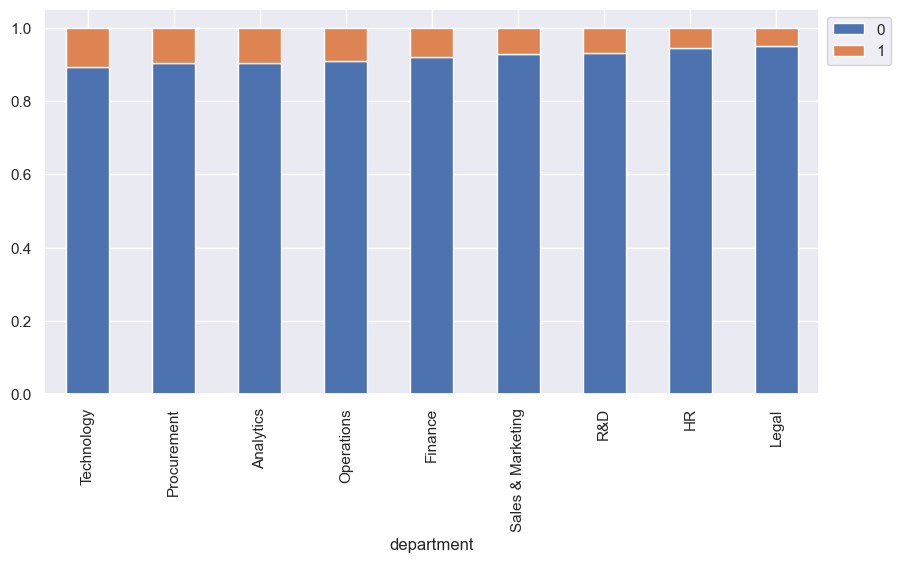

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "department", "is_promoted")

## Target variable vs Education

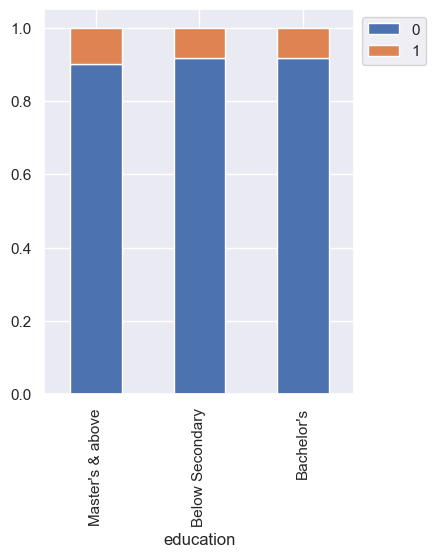

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "education", "is_promoted")

## Target variable vs Gender

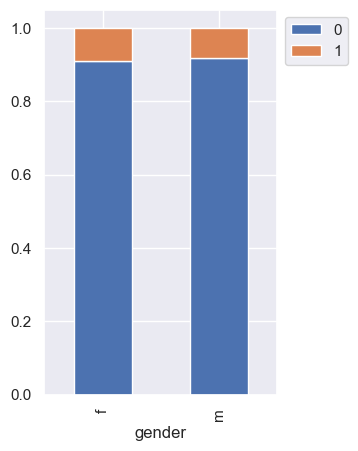

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "gender", "is_promoted")

## Target Variable vs Recruitment channel

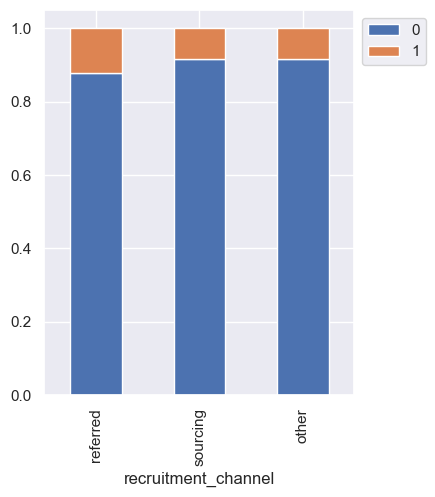

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(data, "recruitment_channel", "is_promoted")

## Taregt Vairable vs Previous year rating

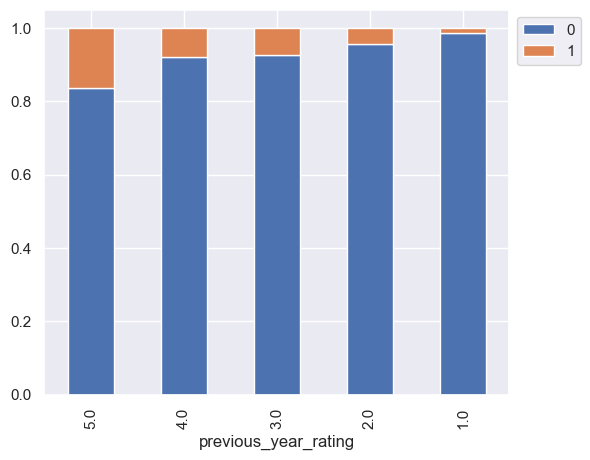

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(data, "previous_year_rating", "is_promoted")

Compared to other previous ratings, those with a rating of 5 have the highest chance of being promoted.

## Target variable vs Awards won

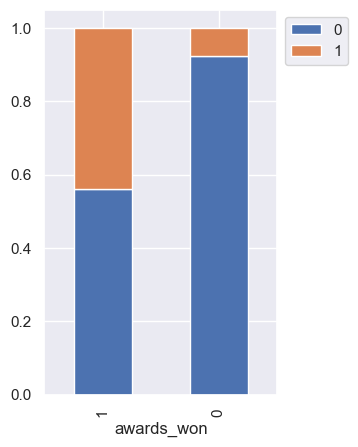

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(data, "awards_won", "is_promoted")

Those with 1 awards won are more promoted compared to those with no awards

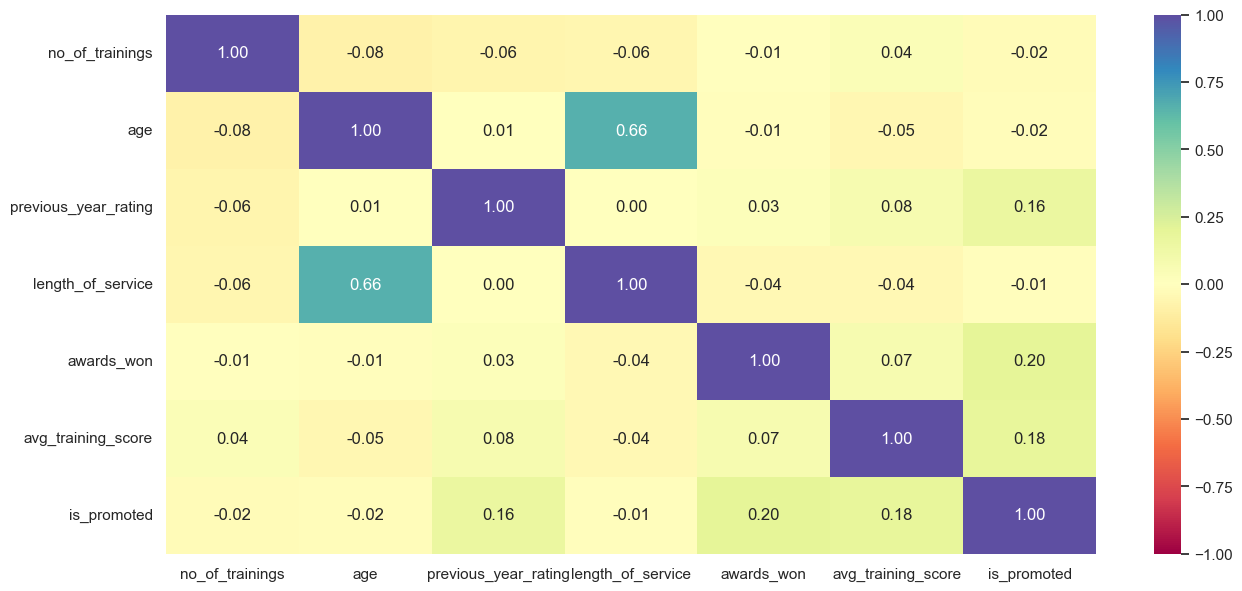

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

The heatmap shows correlation between numerical variables. Age vs length of service and age vs length of service have the highest correlation of 0.66, which is expected. Looking at our target vs other variables, awards won, average training score, and previous year rating have the highest correction at 0.20,0.18 and 0,16 respectively

## Missing values imputation

In [44]:
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

<IPython.core.display.Javascript object>

- We have missing values in education, previous year rating and average training score columns. 

- We will impute numerical missing values with mode and categorical missing values with median.

In [45]:
data1 = data.copy()  # Creating a copy of the original data o avoid unexpected changes

<IPython.core.display.Javascript object>

In [46]:
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_median = SimpleImputer(strategy="median")

<IPython.core.display.Javascript object>

In [47]:
X = data1.drop(["is_promoted"], axis=1)  ## Independent variables/predictors
y = data1["is_promoted"]  ## Target variable

<IPython.core.display.Javascript object>

In [48]:
## We will split the data into training and test data
## The training data will also be split into validation and train data

X_training, X_test, y_training, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)
# Lets now split the training data to validation and train sets
X_train, X_val, y_train, y_val = train_test_split(
    X_training, y_training, test_size=0.25, random_state=1, stratify=y_training
)

print(X_train.shape, X_val.shape, X_test.shape)

(32884, 11) (10962, 11) (10962, 11)


<IPython.core.display.Javascript object>

In [49]:
## Fitting and tranforming the train data
X_train[["education"]] = imputer_mode.fit_transform(X_train[["education"]])

## Tranforming the validation data
X_val[["education"]] = imputer_mode.transform(X_val[["education"]])

## tranforming the test data
X_test[["education"]] = imputer_mode.transform(X_test[["education"]])

<IPython.core.display.Javascript object>

In [50]:
## Fitting and tranforming the train data
X_train[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_train[["previous_year_rating", "avg_training_score"]])
## Tranforming the validation data
X_val[["previous_year_rating", "avg_training_score"]] = imputer_median.transform(
    X_val[["previous_year_rating", "avg_training_score"]])
## Tranforming the test data
X_test[["previous_year_rating", "avg_training_score"]] = imputer_median.transform(
    X_test[["previous_year_rating", "avg_training_score"]])


<IPython.core.display.Javascript object>

In [51]:
# Checking if there is still any missing values
print(X_train.isnull().sum())
print("*" * 40)
print(X_val.isnull().sum())
print("*" * 40)
print(X_test.isnull().sum())


department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
****************************************
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
****************************************
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


<IPython.core.display.Javascript object>

All missing data from the three data sets have been treated

## Building the model

In [52]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(32884, 52) (10962, 52)


<IPython.core.display.Javascript object>

In [53]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred, average="macro")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [54]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [55]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "f1_macro"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_val, model.predict(X_val), average="macro")
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 57.63640024210679
Bagging: 70.46454773316093
Random forest: 66.60680923823975
GBM: 69.53949501192146
Adaboost: 61.80957339408384
Xgboost: 72.01192446148467
dtree: 65.05089540323208

Validation Performance:

Logistic regression: 0.5853801749149201
Bagging: 0.7060522382098885
Random forest: 0.6749629920498028
GBM: 0.6985500122041621
Adaboost: 0.6115403275532472
Xgboost: 0.7260409339776603
dtree: 0.6532891798794527


<IPython.core.display.Javascript object>

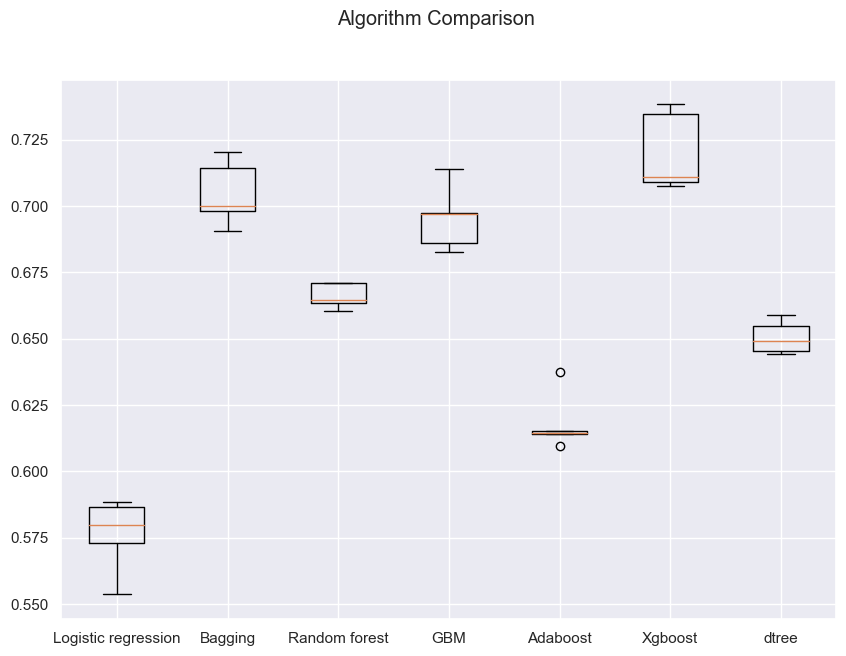

<IPython.core.display.Javascript object>

In [56]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- Xgboost,Bagging and GBM have the best performance 
- Under undersampled data,Xgboost,GBM and Bagging have the best peroformance  

## Tuning Xgboost

In [57]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.7271239242195137:
Wall time: 20min 10s


<IPython.core.display.Javascript object>

In [59]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=2,
    n_estimators=200,
    learning_rate=0.1,
    gamma=3,
)
tuned_xgb2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

In [60]:
xgb2_train = model_performance_classification_sklearn(tuned_xgb2, X_train, y_train)
xgb2_train

,Accuracy,Recall,Precision,F1
0,0.945,0.398,0.896,0.761


<IPython.core.display.Javascript object>

In [61]:
xgb2_val = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
xgb2_val

,Accuracy,Recall,Precision,F1
0,0.939,0.365,0.824,0.737


<IPython.core.display.Javascript object>

- The tuned model for both train and validation data sets have a very low recall score

## Tuning Gtradient Boosting Model

In [62]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7156908531626998:
Wall time: 6min 33s


<IPython.core.display.Javascript object>

In [63]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [64]:
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.942,0.329,0.954,0.729


<IPython.core.display.Javascript object>

In [65]:
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.939,0.316,0.922,0.719


<IPython.core.display.Javascript object>

In [66]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.716991583866934:
Wall time: 6min 56s


<IPython.core.display.Javascript object>

In [69]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

In [70]:
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.941,0.329,0.940,0.728


<IPython.core.display.Javascript object>

In [71]:
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.940,0.322,0.918,0.723


<IPython.core.display.Javascript object>

In [72]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb2_train.T,
        gbm2_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost",
    "Gradient Boosting",
    "AdaBoost",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost,Gradient Boosting,AdaBoost
Accuracy,0.945,0.942,0.941
Recall,0.398,0.329,0.329
Precision,0.896,0.954,0.940
F1,0.761,0.729,0.728


<IPython.core.display.Javascript object>

In [73]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [xgb2_val.T, gbm2_val.T, adb2_val.T],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost",
    "Gradient Boosting",
    "AdaBoost",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,XGBoost,Gradient Boosting,AdaBoost
Accuracy,0.939,0.939,0.940
Recall,0.365,0.316,0.322
Precision,0.824,0.922,0.918
F1,0.737,0.719,0.723


<IPython.core.display.Javascript object>

In [74]:
xgb2_test = model_performance_classification_sklearn(tuned_xgb2, X_test, y_test)
xgb2_test

,Accuracy,Recall,Precision,F1
0,0.938,0.362,0.807,0.733


<IPython.core.display.Javascript object>

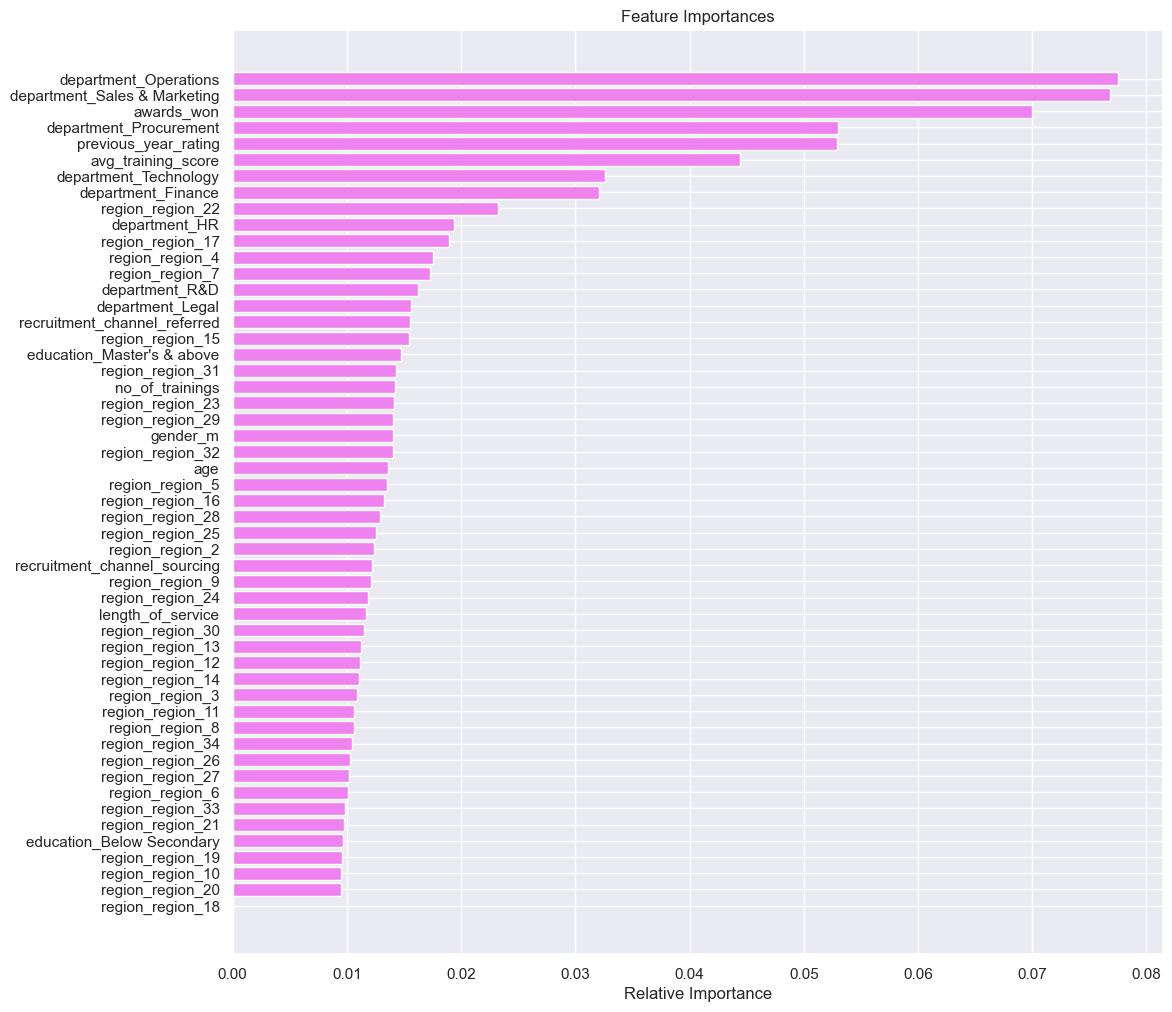

<IPython.core.display.Javascript object>

In [75]:
feature_names = X_train.columns
importances = tuned_xgb2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Using Column Transformer to build the final model

In [76]:
# creating a list of numerical variables
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features" 
# and "categorical_features" 


<IPython.core.display.Javascript object>

In [77]:
# Separating target variable and other variables
X = data1.drop(columns="is_promoted")
Y = data1["is_promoted"]

<IPython.core.display.Javascript object>

## Pre-Processing

In [78]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(38365, 11) (16443, 11)


<IPython.core.display.Javascript object>

In [79]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                eval_metric="logloss",
                subsample=0.9,
                scale_pos_weight=2,
                n_estimators=200,
                learning_rate=0.1,
                gamma=3,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'awards_won',
                                                   'avg_training_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                    

<IPython.core.display.Javascript object>

In [80]:
import pickle

with open("employee_promotion_Assignment.pkl", "wb") as f:
    pickle.dump(model, f)

<IPython.core.display.Javascript object>

In [81]:
!pip install gradio

<IPython.core.display.Javascript object>

In [ ]:
import gradio as gr
import pickle
import pandas as pd

def make_prediction(department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, length_of_service, awards_won, avg_training_score):
    with open("employee_promotion_Assignment.pkl", "rb") as f:
        clf  = pickle.load(f)
        input_data = pd.DataFrame([[department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, 
                   length_of_service, awards_won, avg_training_score]], columns=['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score'])
        preds = clf.predict(input_data)[0]
    if preds == 1:
            return "You are eligible for Promotion"
    return "You are not eligible for Promotion"

# Define the input fields for the model
department = gr.inputs.Dropdown(choices=['HR' , 'Analytics', 'Operations', 'Technology', 'Sales'], label='Department')
region = gr.inputs.Dropdown(choices=['North', 'South', 'East', 'West'], label='Region')
education = gr.inputs.Dropdown(choices=['Bachelor\'s', 'Master\'s', 'Doctorate'], label='Education')
gender = gr.inputs.Dropdown(choices=['Male', 'Female'], label='Gender')
recruitment_channel = gr.inputs.Dropdown(choices=['Referrals', 'Campus', 'Online'], label='Recruitment Channel')
no_of_trainings = gr.inputs.Number(label='No. of Trainings')
age = gr.inputs.Number(label='Age')
previous_year_rating = gr.inputs.Number(label='Previous Year Rating')
length_of_service = gr.inputs.Number(label='Length of Service')
awards_won = gr.inputs.Number(label='Awards Won')
avg_training_score = gr.inputs.Number(label='Avg. Training Score')

# We create the output
output = gr.Textbox()

app = gr.Interface(fn = make_prediction, inputs=[department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, length_of_service, awards_won, avg_training_score], outputs=output)
app.launch(show_error=True, debug=True, inline=False, share=True)


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://3db983f720f7f527fe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [1]:
#with open('/content/drive/MyDrive/Data_Science_Training/Python_For_Data_Science/employee_promotion.ipynb', 'r') as f:
   # nb = nbformat.reads(f.read(), as_version=4)

#Create an html exporter
#htmlexporter = HTMLExporter()
# htmlexporter.template_file = 'basic'

#Write the generated html to a file
#with open('/content/drive/MyDrive/Colab Notebooks/employee_promotion.html', 'w') as f:
    #f.write(htmlexporter.from_notebook_node)


In [10]:
ipython nbconvert employee_promotion_Assignment.ipynb
ls
employee_promotion_Assignment.ipynb   employee_promotion_Assignment.html    employee_promotion_Assignment_files/

SyntaxError: invalid syntax (659212225.py, line 1)